# **<center>Dataton Septiembre 2020 - Immune Institute</center>** 

![Immune](https://i.imgur.com/0TSSaqL.png)  



¡Bienvenido al Datatón de Immune! Como ya habéis visto en el video, vuestro trabajo consiste en desarrollar un algoritmo con el que podamos averiguar las personas que padecerán del problema cardíaco causado el ataque químico. Para lograr este objetivo, usaréis un conjunto de datos de otros pacientes para poder analizar las variables necesarias y construir el modelo de machine learning que nos ayudará a detectar la enfermedad. 


**Instrucciones:**
- Se usará el lenguaje de programación Python 3.
- Se usarán las librerías de python: Pandas, MatPlotLib, Numpy, Scikit-learn.

**Mediante este ejercicio, aprenderemos:**
- Entender y ejecutar Notebooks con Python.
- Ser capaz de utilizar funciones de Python y librerías adicionales.
- Dataset:
 - Obtener el dataset y previsualizar la información del dataset.
 - Representar y analizar la información del dataset.
- Crear y entender el concepto de "*Conjunto de datos de entrenamiento*" y "*Conjuntos de datos de test*"
- Crear y entender el concepto de "*Clasificador*" para analizar los datos,  predecir y obtener conclusiones.
- Mejorar la predicción.


¡Comencemos!

## **1. Importa las librerías necesarias**

Vamos ahora a descargar las herramientas necesarías para trabajar. 

**Nota:** Recuerda que para ejecutar cada celda (caja) tienes que usar **Shift+Enter**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## **2. Cargar el dataset**

Para cargar los datos, debes subirlos desde la carpeta que tienes en la esquina superior izquierda. Una vez guardados, los almacenaremos en un dataframe llamado **data** 

In [ ]:
data = pd.read_csv('data_reto.csv')

### 2.1 Muestra los primeros valores del archivo para hacernos una idea del contenido de la tabla con el código: data.head()

In [ ]:
data.head()

,TCI,TCSC,exp,expmod,cm,cvbin,frqbin,abin,kurt,vfleak,M,A1,A2,A3,mav,psr,hilb,SamEn,x3,x4,x5,x1,x2,bCP,bWT,bW,Li,count1,count2,count3,VF
0,360.08,42.933,60,135,0.109620,0.15281,1.75,812,0.23413,0.65476,2.0421,0.014453,0.30493,1.36910,0.55733,0.089375,0.093750,0.17286,0.014595,12,1.8930,0.52618,0.003299,0.258,0.48395,2.1362,49.342,19.25,73.75,8.0208,0
1,333.41,54.733,120,150,0.149490,0.19259,2.25,740,-0.64581,0.45448,1.3178,0.039420,0.48202,0.51023,0.71640,0.097500,0.110000,0.21055,0.016797,14,2.6258,0.61896,0.002891,0.220,0.32814,1.5259,28.785,45.00,89.25,25.8700,0
2,359.18,46.600,90,180,0.169420,0.23900,3.00,606,0.26447,0.61511,2.0970,0.008673,0.31914,1.39090,0.59793,0.095625,0.106870,0.17792,0.014741,9,1.8930,0.56023,0.005732,0.302,0.34270,1.8921,32.381,28.50,78.25,13.4750,0
3,416.67,41.867,0,135,0.119590,0.15029,1.75,816,0.65061,0.65536,1.7065,0.016068,0.39236,0.83470,0.54609,0.083750,0.081875,0.15856,0.007259,9,2.0151,0.50644,0.003234,0.288,0.47740,1.8311,16.677,28.50,77.50,13.6130,0
4,544.08,49.333,120,120,0.099658,0.16490,2.00,792,-0.14313,0.61120,1.9452,0.000729,0.42743,1.15410,0.64798,0.090000,0.096875,0.15663,0.009556,10,1.8930,0.28983,0.003547,0.266,0.48095,2.0142,12.484,24.75,74.75,10.5270,0


### 2.2 Variables

![Immune](https://i.imgur.com/Pm5M20g.png)  

El dataset consiste en un conjunto de 30 parámetros calculados a partir del Electrocardiograma (ECG). Estos parámetros, recogen distintas características del ECG, desde su comportamiento temporal como a amplitud, pendiente, etc. Hasta carácterísticas un poco más complejas como variables espectrales. A continuación, se muestra la lista completa de parámetros:

**Parámetros termporales** 

* TCI = threshold crossing interval 

* TCSC = threshold crossing sample count 

* Exp = exponencial estandard

* Expmod = exponencial modificada 

* MAV = valor medio absoluto

* count1 

* count2 

* count3

* x1

* x2

* bCP

**Parámetros espectrales** 

* vFleak = VF filter

* M

* A1

* A2

* A3

* x3

* x4

* x5

* bWT

**Parámetros de tipo tiempo-frecuencia**

* Li = basada en el análisis de ondas del ECG.

**Parámetros de complejidad del ECG** 

* CM = medida de la complejidad

* CVbin = covarianza

* abin = area

* Frqbin = frecuencia

* Kurt = Curtosis de una señal binaria extraída del ECG

* PSR = La reconstrucción del espacio de fase  

* HILB = La transformación de Hilbert

* SamEn = Muestra de entropía



### 2.3 Variable de salida

La variable que utilizaremos para clasificar los datos será **VF**. Donde:
- 0 nos indica que la persona está sana
- 1 nos indica que la persona tiene una Fibrilación Ventricular (VF). 





## **4. Analizar dataset:**

![Immune](https://i.imgur.com/FBQ64Uz.png)italicised text

Para entender la distribución de los datos, vamos a observar:

- La cantidad de datos (count)
- La distribución de los datos mediante cuartiles (25%,50%,75%)
- Media de los datos (mean)
- Mínimos y máximos (min, max)
- Varianza (std)
- ...

**a)** Utiliza la función .describe() para analizar la distribución de los datos

In [ ]:
data.describe()

,TCI,TCSC,exp,expmod,cm,cvbin,frqbin,abin,kurt,vfleak,M,A1,A2,A3,mav,psr,hilb,SamEn,x3,x4,x5,x1,x2,bCP,bWT,bW,Li,count1,count2,count3,VF
count,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000
mean,504.320221,26.311054,86.337743,145.712880,0.153696,0.182451,2.793489,727.499344,6.194699,0.709490,2.749058,0.019585,0.287437,1.724214,0.380546,0.066870,0.074796,0.175772,0.013203,8.360595,2.944714,0.524501,0.064652,0.581557,0.234248,5.008640,25.916175,24.271731,74.598759,11.240366,0.170129
std,262.511975,20.286627,74.512381,66.011499,0.055616,0.063978,1.310632,126.400750,5.669886,0.167951,1.450825,0.017451,0.168817,0.962400,0.205014,0.020481,0.022989,0.110073,0.027817,6.357190,1.531353,0.195080,0.066675,0.261768,0.183484,2.433811,19.471469,9.173761,14.051281,8.418466,0.375767
min,121.520000,2.266700,0.000000,15.000000,0.029897,0.015760,0.000000,500.000000,-1.618400,0.114860,0.689660,0.000000,0.046368,0.000000,0.115220,0.023750,0.023750,0.030731,0.000025,0.000000,1.038100,0.103090,0.000227,0.030000,0.013999,0.244140,1.004900,9.500000,39.500000,1.999400,0.000000
25%,297.872500,10.533000,30.000000,90.000000,0.109620,0.152180,1.750000,624.000000,0.690283,0.662507,1.679925,0.006767,0.164302,0.932098,0.241390,0.051250,0.056875,0.099629,0.000597,4.000000,1.770900,0.388305,0.010427,0.346000,0.096474,3.356900,9.047500,17.750000,64.000000,5.608250,0.000000
50%,436.110000,17.333000,75.000000,135.000000,0.149490,0.202680,2.500000,718.000000,6.123800,0.771580,2.324500,0.015374,0.237275,1.804650,0.289915,0.063125,0.071250,0.134770,0.001962,6.000000,2.503700,0.499795,0.047565,0.662000,0.177870,5.188000,22.549000,22.750000,72.500000,8.789250,0.000000
75%,631.140000,42.450250,120.000000,195.000000,0.189350,0.234860,3.750000,813.000000,9.218200,0.824950,3.575000,0.028520,0.357962,2.539975,0.503550,0.085625,0.094375,0.212240,0.009122,10.000000,3.602800,0.621315,0.088832,0.796000,0.327257,6.713900,38.808500,27.750000,83.500000,13.360000,0.000000
max,1861.200000,83.867000,450.000000,375.000000,0.358770,0.250250,8.750000,984.000000,57.369000,0.917030,9.151600,0.131940,1.000100,3.550300,1.220900,0.106250,0.120000,0.563790,0.316800,30.000000,9.831500,0.993650,0.323140,0.948000,1.084600,11.536000,103.180000,83.000000,123.750000,78.707000,1.000000


Escribe acá toda la información relevante que detectes de la tabla anterior:

**b)** Calcula el total de personas afectadas (VF=1) y sanas (VF=0) del dataframe

In [ ]:
data['VF'].value_counts()

0    7590
1    1556
Name: VF, dtype: int64

### 4.1 Analizar las relaciones de las variables del *dataset*

Uno de los primeros pasos que debe hacer un Data Scientist es analizar si existen o no relaciones entre las variables y la salida.

-  ¿Que método usarías para analizar esta relación?
-  ¿Cual de estas variables está relacionada con **VF**, y cuál no?


**c)** Crea una matriz de correlación para analizar esta relación entre las variables.

Ayuda: puedes usar el método .corr()

In [ ]:
data.corr()

,TCI,TCSC,exp,expmod,cm,cvbin,frqbin,abin,kurt,vfleak,M,A1,A2,A3,mav,psr,hilb,SamEn,x3,x4,x5,x1,x2,bCP,bWT,bW,Li,count1,count2,count3,VF
TCI,1.000000,-0.445618,-0.005917,-0.769134,-0.276410,0.030767,-0.291364,-0.079778,0.332334,0.378515,0.244238,-0.124446,-0.372909,0.334367,-0.426169,-0.475456,-0.498754,-0.561556,-0.377648,-0.497669,-0.157299,-0.393403,0.180112,0.546616,-0.476794,0.277528,-0.042595,-0.416508,-0.506651,-0.447452,-0.404197
TCSC,-0.445618,1.000000,0.458636,0.501847,0.277459,0.302579,0.279741,-0.248836,-0.827011,-0.861963,-0.460110,0.056265,0.794618,-0.613230,0.976458,0.906102,0.916627,0.755359,0.742955,0.874635,0.087630,0.514487,-0.533498,-0.915754,0.861707,-0.786621,0.382662,0.616872,0.765177,0.714276,0.760128
exp,-0.005917,0.458636,1.000000,0.047709,0.388313,0.426794,0.426856,-0.469708,-0.427668,-0.473090,-0.260926,0.069687,0.423225,-0.380511,0.489107,0.382855,0.374143,0.334207,0.478290,0.489165,0.302873,0.277493,0.030773,-0.341859,0.452580,-0.205669,0.013219,0.408508,0.395916,0.396591,0.396708
expmod,-0.769134,0.501847,0.047709,1.000000,0.361828,0.031464,0.390859,0.005684,-0.362090,-0.466940,-0.321022,0.157777,0.438454,-0.381462,0.477372,0.505347,0.535483,0.675833,0.487331,0.591184,0.246803,0.512496,-0.208919,-0.592905,0.529507,-0.340765,0.108261,0.460854,0.539632,0.517664,0.532623
cm,-0.276410,0.277459,0.388313,0.361828,1.000000,0.659772,0.968645,-0.634038,-0.281312,-0.362453,-0.300777,0.177746,0.276195,-0.325538,0.255282,0.367356,0.360598,0.548059,0.314410,0.375339,0.313796,0.407858,-0.115767,-0.353971,0.333402,-0.194241,0.045048,0.344783,0.410124,0.367627,0.353583
cvbin,0.030767,0.302579,0.426794,0.031464,0.659772,1.000000,0.643170,-0.968397,-0.276709,-0.348240,-0.237171,0.000707,0.262085,-0.215830,0.290824,0.318954,0.323017,0.234382,0.266393,0.297069,-0.002228,0.328026,-0.403599,-0.243822,0.295411,-0.356291,0.067844,0.203983,0.244684,0.234055,0.275047
frqbin,-0.291364,0.279741,0.426856,0.390859,0.968645,0.643170,1.000000,-0.630540,-0.279729,-0.380638,-0.328799,0.176693,0.304492,-0.352580,0.270078,0.349671,0.347524,0.543460,0.342226,0.394099,0.359116,0.424455,-0.079743,-0.358138,0.363770,-0.186673,-0.005732,0.369445,0.422010,0.382939,0.360266
abin,-0.079778,-0.248836,-0.469708,0.005684,-0.634038,-0.968397,-0.630540,1.000000,0.228150,0.319671,0.235783,-0.004128,-0.237722,0.202000,-0.251163,-0.253635,-0.258586,-0.180328,-0.261478,-0.268114,-0.028654,-0.330800,0.329492,0.190381,-0.272162,0.310803,-0.015523,-0.200465,-0.220815,-0.213260,-0.252313
kurt,0.332334,-0.827011,-0.427668,-0.362090,-0.281312,-0.276709,-0.279729,0.228150,1.000000,0.665837,0.393504,-0.065063,-0.612986,0.498935,-0.811620,-0.892677,-0.886901,-0.663294,-0.512852,-0.689227,-0.075160,-0.347252,0.456337,0.797723,-0.716346,0.659980,-0.194662,-0.527273,-0.671008,-0.579144,-0.528579
vfleak,0.378515,-0.861963,-0.473090,-0.466940,-0.362453,-0.348240,-0.380638,0.319671,0.665837,1.000000,0.612485,-0.113123,-0.897804,0.738903,-0.882709,-0.761129,-0.772879,-0.726219,-0.775513,-0.873166,-0.268872,-0.739960,0.495211,0.853991,-0.826938,0.806504,-0.442793,-0.614469,-0.745520,-0.700616,-0.833920


Cuanto más cercano es el valor a 1 o -1, más correlación (lineal) existe. 

- **d)** ¿Cuáles son las variables (features) que más se relacionan con la salida (VF)?

Escribe acá toda la información que consideres relevante de la tabla anterior:

- **Solución:**  Analizando las correlaciones con respecto a VF, estas serían las features con mayor correlación: TCSC, vfleak, A2	A3	mav SamEn	x3	x4

### 4.2 Análisis descriptivo

Representaremos visualmente los datos de manera que:
- Cada punto simbolice una persona
- Un punto es amarillo si la persona es diabética, y azul si no lo es
- Los ejes x e y representan dos variables que queramos comparar

Función auxiliar para representar gráficas de valores del dataset

In [ ]:
# FUNCION AUXILIAR; NO MODIFICAR, SOLO EJECUTAR
import plotly.offline as py
import plotly.graph_objs as go

def plot_feat1_feat2(feat1, feat2) :  
    D = data[(data['VF'] != 0)]
    H = data[(data['VF'] == 0)]
    trace0 = go.Scatter(x = D[feat1],  y = D[feat2],  name = 'VF',  mode = 'markers',  marker = dict(color = '#FFD700', line = dict(width = 1)))
    trace1 = go.Scatter(x = H[feat1],y = H[feat2], name='healthy', mode='markers', marker = dict(color = '#7EC0EE', line = dict(width = 1)))
    layout = dict(title = feat1 +" "+"vs"+" "+ feat2, yaxis = dict(title = feat2,zeroline = False),  xaxis = dict(title = feat1, zeroline = False))
    plots = [trace0, trace1]
    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

Intenta explicar que ocurre en la función auxiliar aquí:

Ejemplo para representar información de "2 columnas" vs "la que nos interesa predecir"

In [ ]:
# La representación puede lograrse con el siguiente código:
plot_feat1_feat2('NombreColumna1','NombreColumna2')

**e)** Representa gráficamente la relación entre 'x4' y 'x3'


In [ ]:
plot_feat1_feat2('x4','x3')

**f)** Representa gráficamente la relación entre 'tci' y 'mav'


In [ ]:
plot_feat1_feat2('TCI','mav')

**g)** Representa gráficamente la relación entre otras variables que consideres hayan tenido una buena correlación en la pregunta **c)**

In [ ]:
plot_feat1_feat2('TCSC', 'vfleak')

## **5. Clasificación**

El clasificador es un algoritmo que nos va a permitir analizar un conjunto de datos y clasificarlos en grupos. 

En Machine Learning se utiliza un clasificador para el análisis de datos en [aprendizaje supervisado](https://es.wikipedia.org/wiki/Aprendizaje_supervisado).

![Clasificación](https://static.javatpoint.com/tutorial/machine-learning/images/classification-algorithm-in-machine-learning.png)



**Ejemplo**
- Dado un conjunto de emails, determinar cuál es spam y cuál no.
- Dado un conjunto de imágenes de animales, determinar cuáles son perros.

**Objetivo**
- En este reto, queremos lograr **clasificar** a las personas en con Fibrilación Ventricular ( VF=1) y personas sanas (VF=0). Es un ejercicio de **clasificación**.
- A continuación puede visualizarse la diferencia entre "clasificación" y "regresión"
![Clasificación vs regresión](https://res.cloudinary.com/practicaldev/image/fetch/s--c4Lfzdwy--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/mjshszqx4fj22hs12vfn.png)

**Implementación**
- Crear un conjunto de datos de entrenamiento y un conjunto de datos de test
- Crear un clasificador mediante un [tipo de algoritmo](https://www.javatpoint.com/classification-algorithm-in-machine-learning): *RandomForest, XgBoost, KNN*
- Entrenar el clasificador con los "datos de entrenamiento" y de las "features" que queremos tener en cuenta para el entrenamiento.
- Predecir resultados mediante nuestro set de datos de test o mediante nuevos datos.
- Determinar las conclusiones de los resultados obtenidos en las predicciones, como el % de acierto y precisión obtenida.




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = data.drop('VF',axis=1)
y = data['VF']

**h)** Crea un conjunto de datos de entrenamiento y un conjunto de datos de test.

Intrucciones: 

- seed: esta variable será igual la suma de las fechas de cumpleaños de los participantes. 

- test_size: no se permite usar más del 20% de datos para crear el test
[link text](https://)

In [ ]:
seed = 12345  #suma los cumpleños de los participantes 
test_size = 0.20 #0.20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                    random_state=seed)


**h)** Crea el clasificador y entrénalo

In [ ]:
#Crear clasificador Regresión Logística
# Una línea de código
classif =  LogisticRegression(solver = 'liblinear')


# Entrenar el clasificador con las los datos de entrenamiento y las feature
# Una línea de código
classif.fit(X_train,y_train)





LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

**g)** Predecir resultados y determinar acierto. ¡Consigue la mayor precisión posible!

In [ ]:
# Aplicar classif.predict sobre los datos X de test (X_test)
# Una línea de código
y_pred = classif.predict(X_test)

# Mostrar resultado de la predicción del clasificador
print((len(y_test)-sum(abs(y_test-y_pred)))/len(y_test))

0.9819672131147541


# 4. Matriz de Confusión

La Matriz de Confusión es una métrica que nos va a permitir conocer el rendimiento y acierto de una clasificación realizada con Machine Learning.
Podemos encontrar información adicional para entender su objectivo en el siguiente enlace: [ConfusionMatrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)
![texto alternativo](https://miro.medium.com/max/578/1*7EYylA6XlXSGBCF77j_rOA.png)

**h)** Crearemos una matriz de confusión para analizar las predicciones anteriores obtenidas de nuestro clasificador.

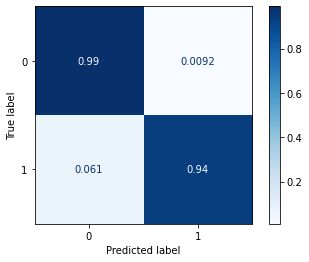

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
disp = plot_confusion_matrix(classif, X_test, y_test,cmap=plt.cm.Blues,normalize = 'true')

¿Qué porcentaje de casos se situa en cada cuadrante? ¿En medicina, es peor un false positive o un false negative? Comenta aquí la matriz y responde a las preguntas:

# 5. Mejorar predicción

¿Crees que puedes mejorar la predicción?

Puedes intentar:

- Optimizar los parámetros del clasificador
- Prueba entrenar otro tipo de clasificador

##**EVALUACIÓN:**
Cuando termines el reto, calcula los siguientes valores para el modelo que mejor predicción obtuviste:
- BER
- Número de variables que usaste para entrenarlo

In [ ]:
import sklearn.metrics as metrics
data_onu = pd.read_csv('data_onu.csv')

# list of features
features = X_train.columns 

X_onu = data_onu.drop('VF',axis=1)
y_onu = data_onu['VF']

y_pred_onu = classif.predict(X_onu[features])

BER = 1 - metrics.balanced_accuracy_score(y_onu, y_pred_onu)
variables = len(features)
print(BER*100)
print(variables)


1.9607843137254832
30


Postea tus resultados en twitter usando el siguiente hashtag #DatatónIMMUNE y @immuneinstitute con el código de tu equipo.

Para poder validar tus resultados, debes adjuntar una imagen de la celda anterior